In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

from tqdm import tqdm

import datetime
import pickle

import torch

# Task 1: Hydrogen Molecule

In [3]:
import torch

from RBM_helper import RBM

import H2_energy_calculator


In [5]:
# Here's the sample code provided in the task at a specific point, r=1.2. 
training_data = torch.from_numpy(np.loadtxt("H2/R_1.2_samples.txt"))
coeff = np.loadtxt("H2/H2_coefficients.txt")[20,:]

true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
print("H2 energy for r = 1.2: ",true_energy)

H2 energy for r = 1.2:  -1.0642022250418146


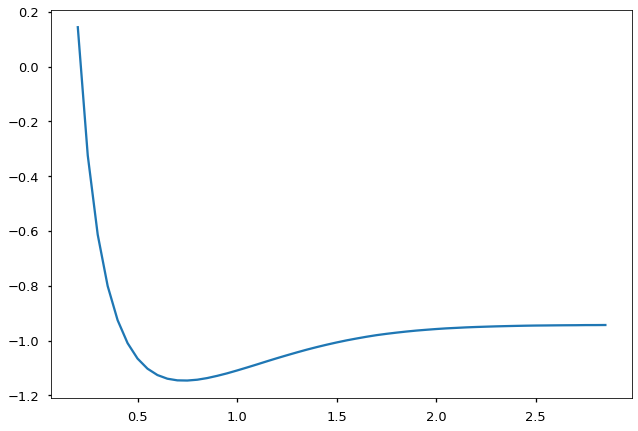

In [ ]:
# Let's see what we get from the energy function first. 

coeffs = np.loadtxt("H2/H2_coefficients.txt")
true_energies = []

for coeff in coeffs:
    i = coeff[0]
    f = f"H2/R_{i}_samples.txt"
    training_data = torch.from_numpy(np.loadtxt(f))
    
    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    true_energies += [ [i,true_energy] ]

#     print(i)
#     print(f, '\n')

true_energies = np.array(true_energies).T    
plt.plot(*true_energies)

# RBM States

- Define the RBM

- Train it  to sample the probability that matches the one for the states. 

- Compare it to the true enery values

In [ ]:
n_vis = 2
n_hin = 10

rbm = RBM(n_vis, n_hin)

epochs = 500 # number of training steps
num_samples = 1000 # number of samples to generate from the RBM to calculate the H2 energy

## Testing the code
Train the RBM:

In [ ]:
%%time
coeffs = np.loadtxt("H2/H2_coefficients.txt")
true_energies = []
rbm_energies = []

for coeff in coeffs[:2]:
    rbm.initialize_parameters()
    i = coeff[0]
    f = f"H2/R_{i}_samples.txt"
    training_data = torch.from_numpy(np.loadtxt(f))
    
    # True energy
    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    true_energies += [ [i,true_energy] ]

    # RBM
    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)   

        # now generate samples and calculate the energy
        if e % 100 == 0:
            print("\nEpoch: ", e)
            print("Sampling the RBM...")

            # For sampling the RBM, we need to do Gibbs sampling.
            # Initialize the Gibbs sampling chain with init_state as defined below.
            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(15, init_state)

            print("Done sampling. Calculating energy...")       

            energies = H2_energy_calculator.energy(RBM_samples, coeff, rbm.wavefunction) 
            print("Energy from RBM samples: ", energies.item())
        
    rbm_energies +=[ [i, energies.item()] ]

true_energies = np.array(true_energies).T 
rbm_energies = np.array(rbm_energies).T 

## Save the results
np.savez_compressed(f'energies_epochs{epochs}_nsmples{num_samples}', rbm=rbm_energies, true=true_energies)



Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.15898207519486107

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.15916552956988408

Epoch:  300
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.15421679642530817

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.1542246905032987

Epoch:  500
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  0.1617038558444119

Epoch:  100
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.296301363805888

Epoch:  200
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.30587073063047204

Epoch:  300
Sampling the RBM...
Done sampling. Calculating energy...
Energy from RBM samples:  -0.3073182135796053

Epoch:  400
Sampling the RBM...
Done sampling. Calculating energy...
Ener

### Full training

In [ ]:
%%time
coeffs = np.loadtxt("H2/H2_coefficients.txt")
true_energies = []
rbm_energies = []

how_many_r = -1

for coeff in coeffs[:how_many_r]:
    print(f'\n \n************\n starting r = {coeff[0]} ... ')
    rbm.initialize_parameters()
    i = coeff[0]
    f = f"H2/R_{i}_samples.txt"
    training_data = torch.from_numpy(np.loadtxt(f))
    
    # True energy
    true_energy = H2_energy_calculator.energy_from_freq(training_data, coeff)
    true_energies += [ [i,true_energy] ]

    # RBM
    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)   

        # now generate samples and calculate the energy
        if e % 100 == 0:
            print(f'for this instance, r is ={i}. \n')
            print("\nEpoch: ", e)
            print("Sampling the RBM...")

            # For sampling the RBM, we need to do Gibbs sampling.
            # Initialize the Gibbs sampling chain with init_state as defined below.
            init_state = torch.zeros(num_samples, n_vis)
            RBM_samples = rbm.draw_samples(15, init_state)

            print("Done sampling. Calculating energy...")       

            energies = H2_energy_calculator.energy(RBM_samples, coeff, rbm.wavefunction) 
            print("Energy from RBM samples: ", energies.item())
        
    rbm_energies +=[ [i, energies.item()] ]
#     print(i)
#     print(f, '\n')

true_energies = np.array(true_energies).T 
rbm_energies = np.array(rbm_energies).T 

## Save the results
np.savez_compressed(f'energies_epochs{epochs}_nsmples{num_samples}', rbm=rbm_energies, true=true_energies)


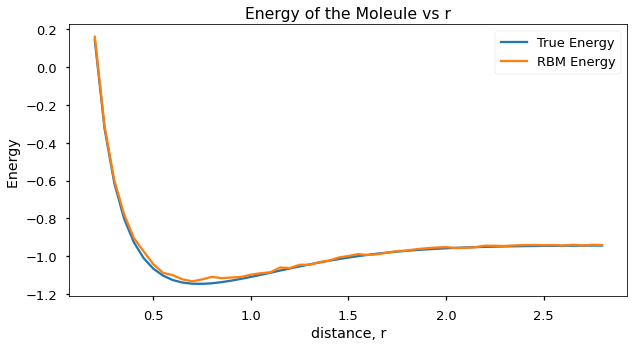

In [82]:
#Plotting the data

#Loading the data
data = np.load('energies_epochs500_nsmples1000.npz')
true_e = data['true']
rbm_e = data['rbm']

##Plotting the loaded data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1, 
                     title = 'Energy of the Moleule vs r', 
                     xlabel = 'distance, r', 
                     ylabel= 'Energy ')

ax.plot(*true_e, label='True Energy')
ax.plot(*rbm_e, label='RBM Energy')
plt.legend(loc=0)
plt.show()

# Task #2

A template code for training an RBM on Rydberg atom data (the full dataset) was provided below. For the first part of this task (determining the minimum number of hidden units. 

Imports and loadining in data:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from RBM_helper import RBM

import Rydberg_energy_calculator

training_data = torch.from_numpy(np.loadtxt("Rydberg_data.txt"))

## There is a gpu eneabled version of this below which needs RBM_helper_gpu.

Define the RBM:

In [ ]:
n_vis = training_data.shape[1]
n_hin = 1

rbm = RBM(n_vis, n_hin)

Train the RBM:

In [ ]:
epochs = 500
num_samples = 2000

exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)

for e in range(1, epochs+1):
    # do one epoch of training
    rbm.train(training_data)   
 
    # now generate samples and calculate the energy
    if e % 100 == 0:
        print("\nEpoch: ", e)
        print("Sampling...")

        init_state = torch.zeros(num_samples, n_vis)
        RBM_samples = rbm.draw_samples(100, init_state)

        print("Done sampling. Calculating energy...") 
 
        energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
        print("Energy from RBM samples: ", energies.item())

        print(f'The energy difference is {np.round( energies.item()-exact_energy, 4 ) }. ')

Exact energy:  -4.1203519096

Epoch:  100
Sampling...
Done sampling. Calculating energy...


/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Energy from RBM samples:  -4.119917680860852
The energy difference is 0.0004. 

Epoch:  200
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.119815691932372
The energy difference is 0.0005. 

Epoch:  300
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.119826762623689
The energy difference is 0.0005. 

Epoch:  400
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.12020977496922
The energy difference is 0.0001. 

Epoch:  500
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.120277217543438
The energy difference is 0.0001. 


In [ ]:
np.round( energies.item()-exact_energy, 4 )<= np.round(.0001, 4)

True

This indicates the task cab be done with just one hidden unit. 
The following code is just a function that starts from nh=1 and goes up until it actually converges to the learnig condition. 

# Part1-PartA: How many hidden units?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import datetime
import pickle

import torch

###Gpu eneabled implementation
# from RBM_helper_gpu import RBM
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##cpu implementation 
from RBM_helper import RBM
device = "cpu"


import Rydberg_energy_calculator

training_data = torch.from_numpy(np.loadtxt("Rydberg_data.txt")).to(device)

epochs = 100
num_samples = 200

exact_energy = -4.1203519096

In [10]:
exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)

## Defining the RBM
n_vis = training_data.shape[1]
n_hin = 1

# rbm = RBM(n_vis, n_hin)


## Setting the training param. 
epochs = 500
num_samples = 2000



Exact energy:  -4.1203519096


In [34]:
'''
This follwoing function returns min n_h needed. 
'''

def min_nh_finder(training_data, num_samples = 200, epochs = 100, Trshld = .0001, nh_max = 10, n_test = 5 ):

    n_h_list = np.arange(1,nh_max, 1)#np.array([1, 3, 6, 9 ])  ## List of the values we want to try for the #hidden units. 
    test_rate = int(epochs/n_test)

    Met_Learning_Cond = False
    error_list_list = []

    Min_nh_Needed = 0
    n_vis = training_data.shape[1]


    for n_h in n_h_list:

        error_list = []

        print(f'\n \n************\n Now let\'s try {n_h} hidden units. ')
        for e in range(1, epochs+1):
            # Initiate the model
            
            rbm = RBM(n_vis, n_h)
            rbm.initialize_parameters()

            # do one epoch of training
            rbm.train(training_data)   

            ## Stop condition
            if e % test_rate == 0:
                print("\n Epoch: ", e)
        #         print("Sampling...")

                init_state = torch.zeros(num_samples, n_vis)
                RBM_samples = rbm.draw_samples(100, init_state)

        #         print("Done sampling. Calculating energy...") 

                energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
                print(" Energy from RBM samples: ", energies.item())

                energy_difference = np.abs(energies.item() - exact_energy) ## Note that this has to be positive. 
                print(" The error (energy difference) is : ", energy_difference )
                error_list += [ [e,energy_difference] ]
                
                if np.abs(energy_difference) <= np.round(Trshld, 4):
#                     print('Yeah, met the learning condition!')
                    Min_nh_Needed = n_h
                    
                    ### This is to save the model. 
                    now = datetime.datetime.now( )
                    model_name = f'Task2_Part1_{now.day}-{now.hour}-{now.minute}_nh={Min_nh_Needed}.pkl'
                    print(f'The model was saved as {model_name}. ')
                    with  open(model_name , 'wb') as f:
                        pickle.dump(rbm, f)
                    Met_Learning_Cond = True
                    break
#                 else:
#                     print('Be a bit more patient, I\'m working on it!')
            
            del(rbm) 

        error_list_list += [error_list]

        ## If satisfied, we need the break the outter loop too. 
        if Met_Learning_Cond:
            break

    if Met_Learning_Cond:
        print('\n========\n********\n Training successful!')
        print(f' Learning criterion reached in {e} epoch for {Min_nh_Needed} hidden nodes. ')
        return Min_nh_Needed, error_list_list, n_h_list
    else:
        print('\n========\n********\n Did not get there! need to try more hidden units...')
        return -1, error_list_list, n_h_list  # This is to indicate that it did not converge. 



In [ ]:
%%time
nh_min, e_list, nh_list = min_nh_finder(training_data, Trshld=.0001, epochs=100, num_samples=1000)

#### Results

We should clarify that different runs give different values for the learning criterion which has to do with the randomness in the samples. 

In [ ]:
%%time
nh_min, e_list, nh_list = min_nh_finder(training_data, Trshld=.0001, epochs=500, num_samples=2000)


 
************
 Now let's try 1 hidden units. 

 Epoch:  100
 Energy from RBM samples:  -4.119893384616185
 The error (energy difference) is :  0.00045852498381471207

 Epoch:  200
 Energy from RBM samples:  -4.120156187420129
 The error (energy difference) is :  0.0001957221798711828

 Epoch:  300
 Energy from RBM samples:  -4.119986086221873
 The error (energy difference) is :  0.00036582337812696153

 Epoch:  400
 Energy from RBM samples:  -4.1194718027291435
 The error (energy difference) is :  0.0008801068708566007

 Epoch:  500
 Energy from RBM samples:  -4.119946400052528
 The error (energy difference) is :  0.00040550954747242685

 
************
 Now let's try 2 hidden units. 

 Epoch:  100
 Energy from RBM samples:  -4.120137534509534
 The error (energy difference) is :  0.00021437509046595693

 Epoch:  200
 Energy from RBM samples:  -4.12007539977863
 The error (energy difference) is :  0.0002765098213703965

 Epoch:  300
 Energy from RBM samples:  -4.120049046946669
 The er

/usr/local/lib/python3.6/dist-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [22]:
## Let's test and make sure that the model really gives the expected result. 
with  open('Task2_Part1_10-16-44-nh=2.pkl', 'rb') as f:
    model = pickle.load(f)

num_samples=2000
init_state = torch.zeros(num_samples, n_vis)
RBM_samples = model.draw_samples(100, init_state)

print("Done sampling. Calculating energy...") 

energies = Rydberg_energy_calculator.energy(RBM_samples, model.wavefunction) 
print(f'The exact energy is {exact_energy}.')
print(f'The rbm samples give an  energy of {energies}.')
print(f'The learning criterion (difference) is {np.round(energies - exact_energy,4)}')

Done sampling. Calculating energy...
The exact energy is -4.1203519096.
The rbm samples give an  energy of -4.120222861302964.
The learning criterion (difference) is 0.0001


### Two points about the runs

- First, if we run the code above multiple times, we will get different results. This is due to the random samples that are drawn each time. 

- The function above, it does not always output the same result. If we run it again, it is likeliy that we may end with one hidden unit as we got in the initial code of this section.

# Task2-PartB

A more compact representation with fewer data points. 

Here we double the number of the hidden units and see how many samples would suffice to meet the learning condition. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import torch
from RBM_helper import RBM

import Rydberg_energy_calculator

training_data = torch.from_numpy(np.loadtxt("Rydberg_data.txt"))

exact_energy = -4.1203519096


In [47]:
epochs = 500
num_samples = 1000

min_n_total_samples = min(1000, num_samples)
n_total_samples_steps = 500

In [49]:
## We first define a new function to gives back a random subset of the training data.
'''
This function gets the data and returns 
a random subset with n samples. 
'''

def return_subset(data, n= n_total_samples_steps):
    random_indx = np.random.randint(0, len(data), n )
    return data[random_indx]
    

In [ ]:
# n_h = 2 # double the amount of hidden units
Trshld = .0001  #Threshold for the learning criterion 
Met_Learning_Cond = False
n_h_list = np.arange(2,8)
epochs = 500  ## I'm starting with 100 epochs for the experimentation/prototype 
num_samples = 2000   ## I'm starting with 200 num samples for the experimentation/prototype 
Min_nh_Needed = 0
n_vis = training_data.shape[1]

test_rate = 30

exact_energy = -4.1203519096
for n_h in n_h_list: # lets try several hidden units in order to plot them
    
    print(f'\n Nº hidden units = {n_h}')
    
    for amount in np.arange(min_n_total_samples, num_samples , n_total_samples_steps):

        print(f'\nAmount {amount}')
        rbm = RBM(n_vis, n_h)
        for e in tqdm(range(1, epochs+1)):
            # do one epoch of training
            rbm.train(return_subset(training_data, amount ) )   

            ## Stop condition
            if e % test_rate == 0:
                print("\n Epoch: ", e)
        #         print("Sampling...")

                init_state = torch.zeros(num_samples, n_vis)
                RBM_samples = rbm.draw_samples(100, init_state)

        #         print("Done sampling. Calculating energy...") 

                energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
                print("Energy from RBM samples: ", energies.item())

                energy_difference = np.abs(energies.item() - exact_energy) ## Note that this has to be positive. 

                if np.abs(energy_difference) < Trshld:
                    print('Yeah, met the learning condition!')
                    Min_nh_Needed = n_h
                    print(f'''
                    Given {epochs} num of epochs and 
                    {num_samples} number of samples and 
                    {n_h} hidden units and
                    the learning condition = {Trshld}, 
                    We need at least {amount} data points and {e} to reach the learning Cond.''')

                    Met_Learning_Cond = True
                    break
                else:
                    print('Be a bit more patient, I\'m working on it!')

        ## If satisfied, we need the break the outter loop too. 
        if Met_Learning_Cond:
            Met_Learning_Cond = False
            break

### Results

In [51]:
import pandas as pd

epochs = [270,300,210]
hidden_units = [2,3,4]
data_points = [16500,10500,6500]

pd.DataFrame({'epochs': epochs, 'hidden_units': hidden_units, 'data_points': data_points})

,epochs,hidden_units,data_points
0,270,2,16500
1,300,3,10500
2,210,4,6500


# Challenges

## 1. RBM for LiH and BeH2


We have run the code and it is fairly similar to the ones we have here. In some sense, it is easier than the second task. This is because the Hamiltonian involves only a few qubits (e.g. 4) which gives rather small Hamiltonians that are easy to diagonalize. 

The Hamiltonian is the Jordan-Wigner Transformed version of the original spin Hamiltonian with the Fermionic Operators and is far more simpler. Note that the Rydberg Hamiltonian involved 100 qubits which makes up aHilbert space of 2^100. 

We feel that this may be one of the main difference between this part and the one from before. 

## 2. Other Techniques for unsupervisod representation of the state

For this, we have trained a RNN model. Specifically, we used a LSTM model which similar to the RBM model, can generate new samples. These samples follow the same statistical properties as the original samples provided in the data. 

Technically, these are one-to-many RNN models that start with a random input number and generate the sequence of the outcomes.

In [52]:
## We do this part using Tensorflow. 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, RepeatVector

gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus)>0:
    tf.config.experimental.set_memory_growth(gpus[0] , True)
    print('Running on GPU ...')
else:
    print('Running on CPU ...')
    
import os
import time

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import torch

import warnings
warnings.filterwarnings('ignore')

import Rydberg_energy_calculator

training_data = np.loadtxt("Rydberg_data.txt")

Running on CPU ...


In [59]:
## Parameters
n_qubits = 100
BATCH_SIZE = 256
rnn_units = 100
n_epoch=3

In [54]:
## Building the data for the training the RNN
X = training_data[:, 0]
y = training_data.reshape(-1, n_qubits, 1)

In [57]:
model = Sequential()
model.add(RepeatVector(n_qubits, input_shape= ( [1]) ))
model.add(LSTM(1, return_sequences=True, activation ='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector_1 (RepeatVecto (None, 100, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 1)            12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [60]:
%%time
history = model.fit(X,y , 
                    batch_size= BATCH_SIZE, 
                    validation_split=0.2,
#                     callbacks=my_callbacks, 
                    verbose=1, 
                    epochs=100)

Epoch 1/100
63/63 [==============================] - 2s 35ms/step - loss: 0.1470 - accuracy: 0.9900 - val_loss: 0.1361 - val_accuracy: 0.9899
Epoch 2/100
63/63 [==============================] - 2s 30ms/step - loss: 0.1273 - accuracy: 0.9900 - val_loss: 0.1190 - val_accuracy: 0.9899
Epoch 3/100
63/63 [==============================] - 2s 31ms/step - loss: 0.1121 - accuracy: 0.9900 - val_loss: 0.1056 - val_accuracy: 0.9899
Epoch 4/100
63/63 [==============================] - 2s 30ms/step - loss: 0.1001 - accuracy: 0.9900 - val_loss: 0.0947 - val_accuracy: 0.9899
Epoch 5/100
63/63 [==============================] - 2s 31ms/step - loss: 0.0902 - accuracy: 0.9900 - val_loss: 0.0858 - val_accuracy: 0.9899
Epoch 6/100
63/63 [==============================] - 2s 32ms/step - loss: 0.0820 - accuracy: 0.9900 - val_loss: 0.0784 - val_accuracy: 0.9899
Epoch 7/100
63/63 [==============================] - 2s 32ms/step - loss: 0.0751 - accuracy: 0.9900 - val_loss: 0.0720 - val_accuracy: 0.9899
Epoch 

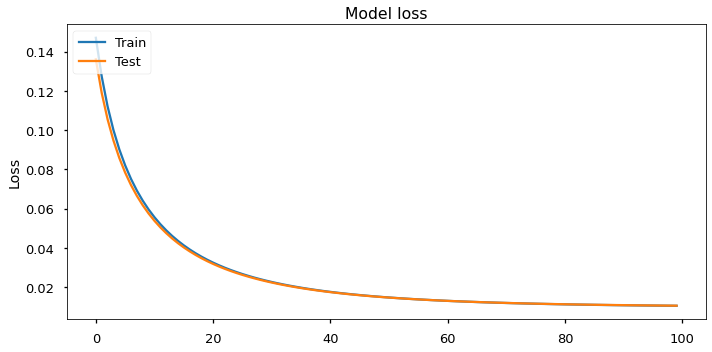

In [62]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [71]:
epochs = 20
num_samples = 500

exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)

for e in range(1, epochs+1):
    # do one epoch of training
    # print('starting ...')
    rbm.train(training_data)   
 
    # now generate samples and calculate the energy
    if e % 5 == 0:
        print("\nEpoch: ", e)
        print("Sampling...")

        init_state = torch.zeros(num_samples, n_vis)
        RBM_samples = rbm.draw_samples(100, init_state)

        print("Done sampling. Calculating energy...") 
 
        energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
        print("Energy from RBM samples: ", energies.item())
        
print(energies.item() - exact_energy)        

Exact energy:  -4.1203519096

Epoch:  5
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.110732537186177

Epoch:  10
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.112932003074396

Epoch:  15
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.115853110873553

Epoch:  20
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples:  -4.117170085397602
0.003181824202398431


In [74]:
## Let's test and see how good the generated states can be. 

##Generating the states
num_validation_sample= 1000
init_state_0 = np.random.randint(0,2,num_validation_sample)
randome_RNN_generated_states = model.predict(init_state_0)


exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)

## Calculating the energy for the RNN generated states. 
randome_RNN_generated_states = randome_RNN_generated_states.reshape(-1, 100)
energies = Rydberg_energy_calculator.energy(torch.tensor(randome_RNN_generated_states), rbm.wavefunction) 
        
print(np.round(np.abs(energies.item() - exact_energy),4))  

Exact energy:  -4.1203519096
0.0141


As is evident, this simple RNN, with only 12 parameters can give a good approximation to the state (within ~ .0141) approx. of the state. 

It would be interesting to play with this and to improve this and compare the number of parameters in RNN and RBM and see which one gives a more efficient representation of the quantum state. 

## 3. Other datasets

We have found the following 

http://quantum-machine.org/datasets/

I guess the data here are generated with different approaches and based on different degrees of freedom so it is not clear how cohesive this approach would be. Some only capture the Coulomb interaction and some the spin degree of freedom.  

## 4. DWave data

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = np.load('IsingSamplesDW/dataset_x1a46w3557od23s750k9.npz')
data.files

['train', 'validation']

In [79]:
train_data = data['train']
val_data = data['validation']
print(val_data.shape)
train_data.shape

(10000, 2041)


(40000, 2041)

In [25]:
df = pd.read_csv('IsingSamplesDW/correlated_features.csv', index_col='Unnamed: 0')
print(len(df))
df.head()

5974


,left,right
0,0,4
1,1,4
2,2,4
3,3,4
4,0,5


It is not clear what this data is and what they are representing. We would be happy to give it a shot, if we get more information. 

# Business Application

It seems to us that this is classical algorithm that gives a compact representation of the quantum states. 

This could be potentially helpful for validation and benchmarking the outcomes of a quantum computer or a quantum simulator that tries to solve problems in Quantum Chemistry. 

For NISQ devices, since error correction and FT is not available yet, we would need metrics to make sure that the quantum output is relevant. 

One approach would be that we train an RBM that mimics the state from the experimental data on the molecule and then compare it to the result of the quanutm computer or quantum simulator. 

This could be potentially interesting for companies like IBMQ and Google that aim at solveing quantum Chemistry problems using their NISQ devices. 

For the 90 sec. video, plese follow this link:

https://drive.google.com/drive/folders/1nyog3QDPF9_2ES5k6dIMDEVECFrid3Ir?usp=sharing
